In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [9]:
data_user1 = torch.load('data_mm_user1.pth')
labels_user1 = torch.load('labels_user1.pth')

C:\Users\devan\AppData\Local\Temp\ipykernel_27784\1562778680.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_user1 = torch.load('data_mm_user1.pth')
C:\Users\devan\

In [10]:
data_user1.size()

torch.Size([1800, 50, 30])

In [11]:
labels_user1.size()

torch.Size([1800])

In [12]:
class Generator(nn.Module):
    def __init__(self, noise_dim, label_dim, output_dim):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(label_dim, label_dim)
        self.net = nn.Sequential(
            nn.Linear(noise_dim + label_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        labels = self.label_emb(labels)
        gen_input = torch.cat((noise, labels), dim=1)
        return self.net(gen_input)

C:\Users\devan\AppData\Local\Temp\ipykernel_27784\3259957021.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  G.load_state_dict(torch.load('generator_300.pth'))


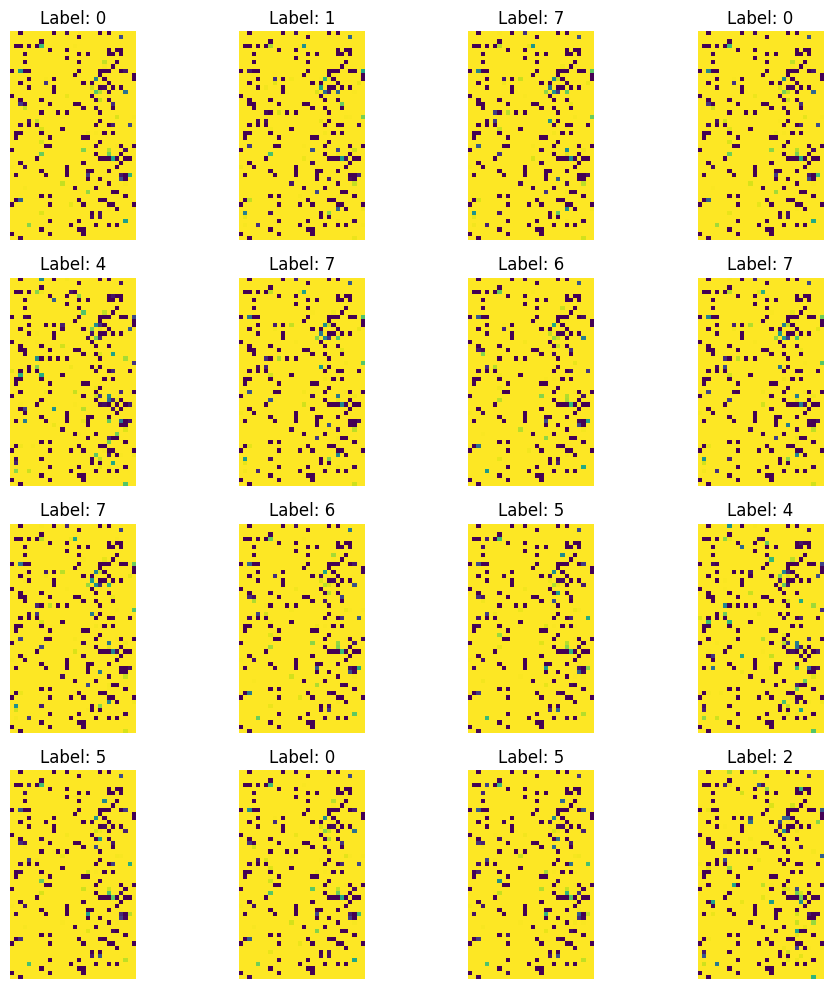

In [18]:
noise_dim = 100
label_dim = 8
output_dim = 50 * 30

G = Generator(noise_dim, label_dim, output_dim)
G.load_state_dict(torch.load('generator_300.pth'))
G.eval()  # Set the generator to evaluation mode

# Generate synthetic data
num_samples = 16
noise = torch.randn(num_samples, noise_dim)
labels = torch.randint(0, label_dim, (num_samples,))

with torch.no_grad():
    synthetic_data = G(noise, labels).cpu().numpy()

# Reshape the synthetic data
synthetic_data = synthetic_data.reshape((num_samples, 50, 30))

# View the synthetic data
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(synthetic_data[i])
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\devan\AppData\Local\Temp\ipykernel_27784\1831401313.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(data_path)
C:\Users\devan\AppData\Local\Te

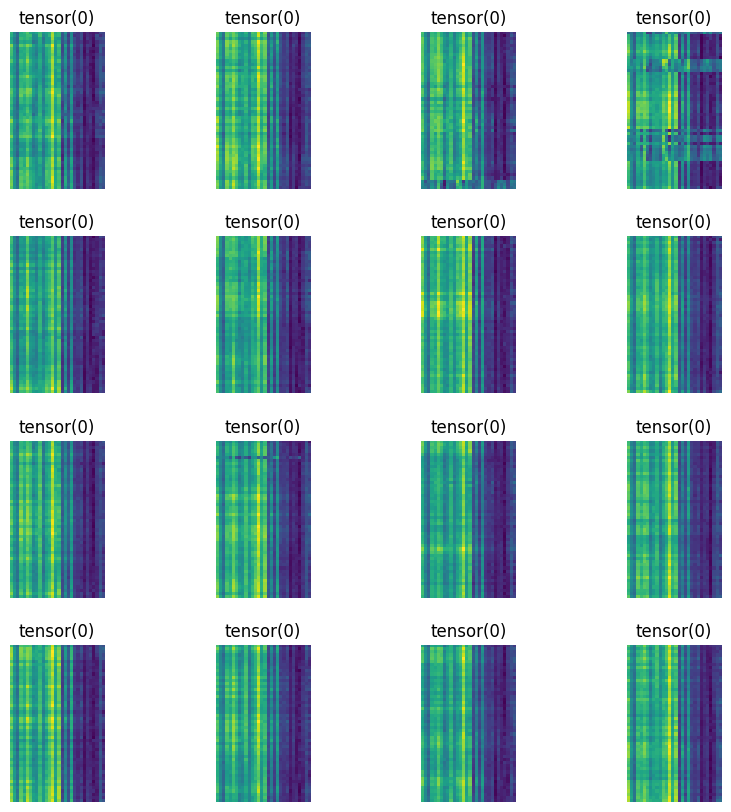

In [22]:
import torch
import matplotlib.pyplot as plt

# Load your data
data_path = 'data_mm_user1.pth'  # replace with the actual path to your .pth file
data = torch.load(data_path)
label_path = 'labels_user1.pth'
labels = torch.load(label_path)

# Example: Viewing a subset of your 3D data (e.g., a batch of images)
def plot_data_subset(data, num_samples=16):
    if len(data.shape) != 3:
        print("This function is designed for 3D data.")
        return
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        if i < num_samples:
            sample = data[i]
            ax.imshow(sample)
            ax.set_title(labels[i])
            ax.axis('off')
    plt.show()

# Plot a subset of the data
plot_data_subset(data, num_samples=16)
